### API활용하여 데이터 받아오기

In [133]:
import pandas as pd
import requests
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import numpy as np

def getLottoWinInfo(startRound, endRound):
    drwtNo1 = []
    drwtNo2 = []
    drwtNo3 = []
    drwtNo4 = []
    drwtNo5 = []
    drwtNo6 = []
    bnusNo = []
    totSellamnt = []
    drwNoDate = []
    firstAccumamnt = []
    firstPrzwnerCo = []
    firstWinamnt = []
    roundNo = []
    
    for i in tqdm(range(startRound, endRound+1, 1)):
        # i = 1
        req_url = "https://www.dhlottery.co.kr/common.do?method=getLottoNumber&drwNo=" + str(i)
        
        req_lotto = requests.get(req_url)
        
        lottoNo = req_lotto.json()
        
        drwtNo1.append(lottoNo['drwtNo1'])
        drwtNo2.append(lottoNo['drwtNo2'])
        drwtNo3.append(lottoNo['drwtNo3'])
        drwtNo4.append(lottoNo['drwtNo4'])
        drwtNo5.append(lottoNo['drwtNo5'])
        drwtNo6.append(lottoNo['drwtNo6'])
        bnusNo.append(lottoNo['bnusNo'])
        roundNo.append(i)
        
        totSellamnt.append(lottoNo['totSellamnt'])
        drwNoDate.append(lottoNo['drwNoDate'])
        firstAccumamnt.append(lottoNo['firstAccumamnt'])
        firstPrzwnerCo.append(lottoNo['firstPrzwnerCo'])
        firstWinamnt.append(lottoNo['firstWinamnt'])
        
        lotto_dict = {"추첨일":drwNoDate, "회차":roundNo, "Num1":drwtNo1, 
                      "Num2":drwtNo2, "Num3":drwtNo3, "Num4":drwtNo4, 
                      "Num5":drwtNo5, "Num6":drwtNo6, "bnsNum":bnusNo, 
                      "총판매금액":totSellamnt, "총1등당첨금":firstAccumamnt, 
                      "1등당첨인원":firstPrzwnerCo, "1등수령액":firstWinamnt}
        
         # pandas로 변환
        db = pd.DataFrame(lotto_dict)
        
        # csv 파일로 저장
        db.to_csv("lotto_win_info.csv", index= False, header=True, encoding='utf-8-sig')

In [134]:
db=getLottoWinInfo(1,939)

100%|██████████| 939/939 [02:12<00:00,  7.11it/s]


저장시킨 csv파일은 pandas의 read_csv메소드를 활용하여 데이터를 불러와 사용하였다.

In [135]:
df=pd.read_csv("lotto_win_info.csv")
df.shape

(939, 13)

In [136]:
df.head(30)

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,2002-12-07,1,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,2002-12-14,2,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2002-12-21,3,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,2002-12-28,4,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,2003-01-04,5,16,24,29,40,41,42,3,6277102000,3041094900,0,0
5,2003-01-11,6,14,15,26,27,40,42,34,15305356000,0,1,6574451700
6,2003-01-18,7,2,9,16,25,26,40,42,12794890000,2600913000,0,0
7,2003-01-25,8,8,19,25,34,37,39,9,20751450000,7336896000,0,0
8,2003-02-01,9,2,4,16,17,36,39,14,73624020000,25803852000,0,0
9,2003-02-08,10,9,25,30,33,41,44,6,260856392000,0,13,6430437900


아래 명령어로 개수, 평균, 표준편차, 최대 최소 등의 간략한 통계정보를 얻을 수 있다.

In [137]:
pd.options.display.float_format = '{:,.12}'.format  # 깔끔하게 나오게 하기 위해
df.describe()

,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
count,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0,939.0
mean,470.0,6.65495207668,13.0638977636,19.9424920128,26.2502662407,32.8477103301,39.5111821086,22.3077742279,"60,205,258,346.1","10,535,584,396.6",7.02129925453,"2,735,270,627.44"
std,271.210250544,5.29192615032,6.88716290908,7.49177904583,7.6654589984,6.89266030454,5.31308002857,13.2131151025,"16,617,614,703.2","7,594,041,363.14",3.76998215836,"2,605,532,129.81"
min,1.0,1.0,2.0,3.0,5.0,9.0,19.0,1.0,"3,681,782,000.0",0.0,0.0,0.0
25%,235.5,2.5,8.0,14.0,21.0,28.0,37.0,11.0,"47,711,823,500.0",0.0,4.0,"1,524,347,876.0"
50%,470.0,5.0,12.0,19.0,26.0,34.0,41.0,22.0,"57,479,716,000.0","12,835,983,375.0",7.0,"2,035,475,025.0"
75%,704.5,10.0,17.5,25.5,32.0,38.0,44.0,34.0,"70,770,897,000.0","16,196,761,314.0",9.0,"3,127,425,777.5"
max,939.0,35.0,37.0,40.0,43.0,44.0,45.0,45.0,2.60856392e+11,"43,624,374,375.0",30.0,"40,722,959,400.0"


### 당첨 번호 분석
데이터들 중 관심 있는 로또 번호만 모아서 통계정보를 나타내보았다.

In [138]:
# 1~6번 번호만 가져오자
df_only_number=pd.DataFrame([df['Num1'], df['Num2'], df['Num3'], 
                             df['Num4'], df['Num5'], df['Num6']]).T

pd.options.display.float_format = '{:,.5}'.format  # 깔끔하게 나오게 하기 위해

for i in range(1, 7):
    print('%d 번 번호 평균 : %d' % (i, int(df_only_number.mean()[i-1])))
    
df_only_number.describe()

1 번 번호 평균 : 6
2 번 번호 평균 : 13
3 번 번호 평균 : 19
4 번 번호 평균 : 26
5 번 번호 평균 : 32
6 번 번호 평균 : 39


,Num1,Num2,Num3,Num4,Num5,Num6
count,939.0,939.0,939.0,939.0,939.0,939.0
mean,6.655,13.064,19.942,26.25,32.848,39.511
std,5.2919,6.8872,7.4918,7.6655,6.8927,5.3131
min,1.0,2.0,3.0,5.0,9.0,19.0
25%,2.5,8.0,14.0,21.0,28.0,37.0
50%,5.0,12.0,19.0,26.0,34.0,41.0
75%,10.0,17.5,25.5,32.0,38.0,44.0
max,35.0,37.0,40.0,43.0,44.0,45.0


### 각 당첨번호 분포 분석
아래 코드를 이용하여 각 당첨번호들의 histogram을 그려보았다.  
아래 그림은 1~6번 당첨번호의 숫자 빈도수 그래프이다. 

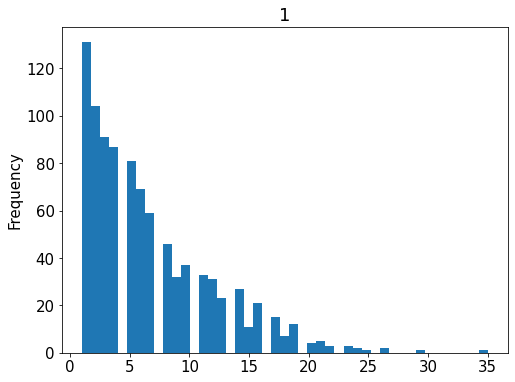

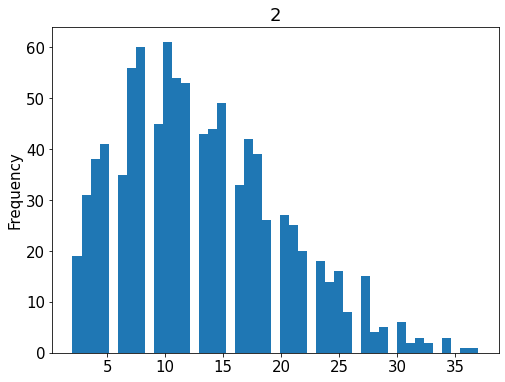

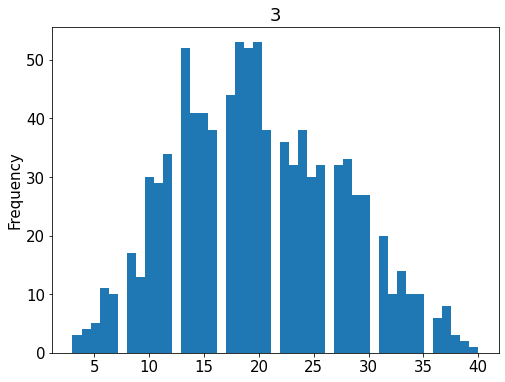

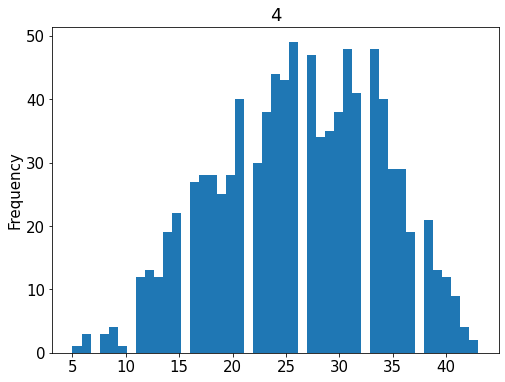

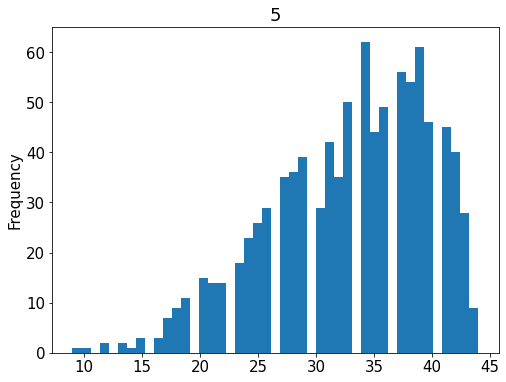

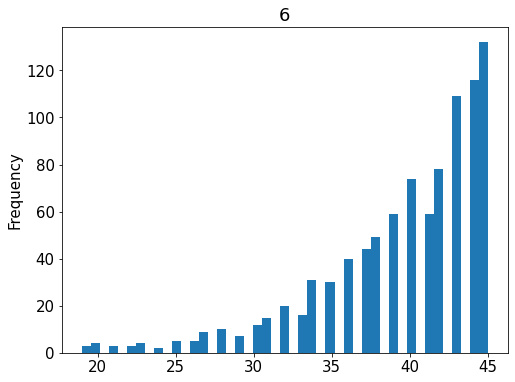

In [139]:
#각 당첨번호들의 histogram
df_only_number['Num1'].plot.hist(bins=45)
plt.title('1')
plt.show()

df_only_number['Num2'].plot.hist(bins=45)
plt.title('2')
plt.show()

df_only_number['Num3'].plot.hist(bins=45)
plt.title('3')
plt.show()

df_only_number['Num4'].plot.hist(bins=45)
plt.title('4')
plt.show()

df_only_number['Num5'].plot.hist(bins=45)
plt.title('5')
plt.show()

df_only_number['Num6'].plot.hist(bins=45)
plt.title('6')
plt.show()

### 1등 당첨 숫자
아래 코드로 특정 회에 1등이 몇 번 당첨됐는지를 확인해보았다.

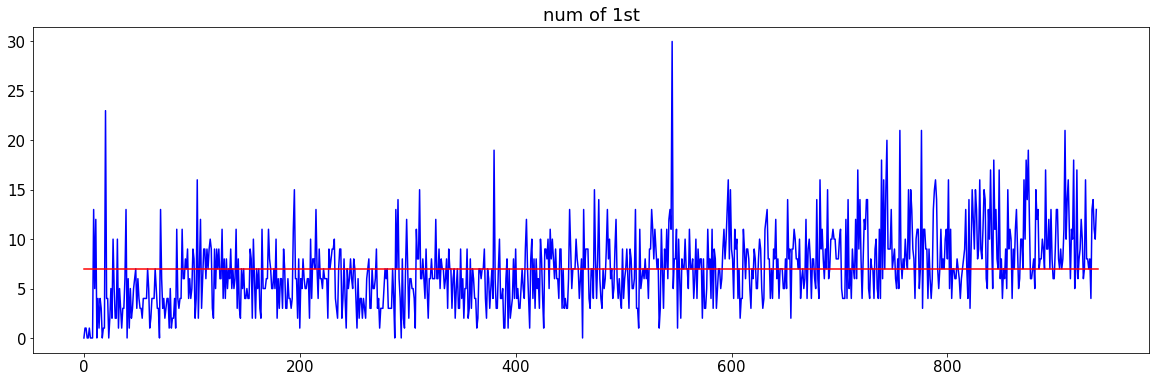

In [140]:
df['1등당첨인원'].plot(figsize=(20,6),color = 'blue')
plt.plot(list(range((len(df['1등당첨인원'])+2))), [df['1등당첨인원'].mean()]*(len(df['1등당첨인원'])+2), 'red')
plt.title('num of 1st')
plt.show()

### 총 판매금액 추이

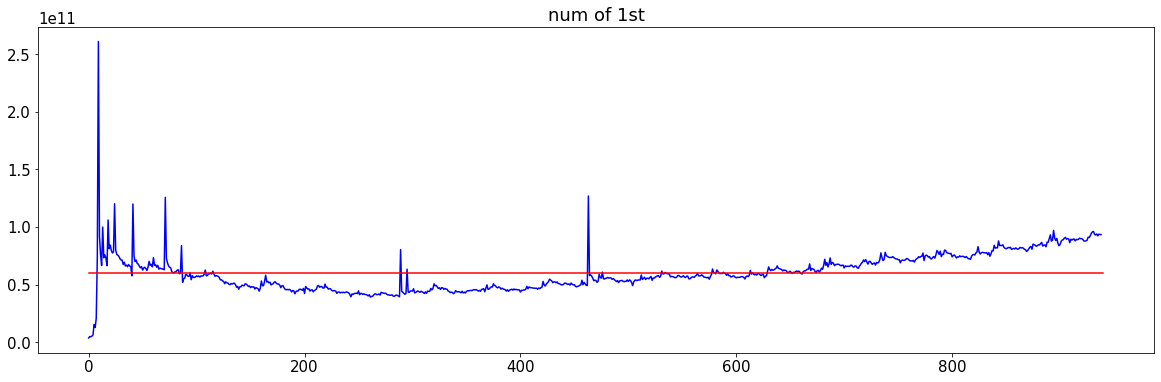

In [141]:
df['총판매금액'].plot(figsize=(20,6),color = 'b')
plt.plot(list(range((len(df['총판매금액'])+2))), [df['총판매금액'].mean()]*(len(df['총판매금액'])+2), 'red')
plt.title('num of 1st')
plt.show()

### 숫자별 평균 개수

평균 갯수 : 125


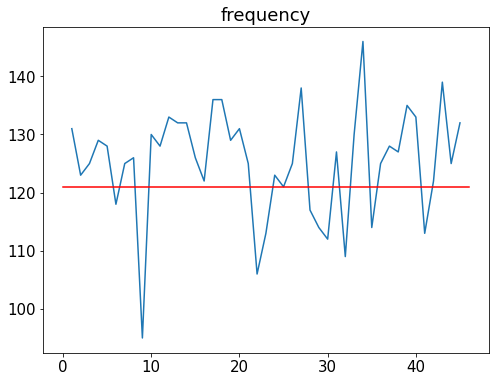

In [142]:
numm_tmp = pd.concat([df_only_number['Num1'], df_only_number['Num2'], df_only_number['Num3'], df_only_number['Num4'], df_only_number['Num5'], df_only_number['Num6']])
numm_tmp1 = numm_tmp.value_counts().sort_index()
print('평균 갯수 : %.0f' % (numm_tmp1.mean()))

plt.plot(numm_tmp1)
plt.plot(list(range((len(numm_tmp1)+2))), [121]*(len(numm_tmp1)+2), 'red')
plt.title('frequency')
plt.show()

1~45번 숫자 중 대부분이 평균 125번씩은 당첨번호에 포함되었다.  [9, 22, 23, 29, 32, 41] 이 6개의 숫자들은 다른 숫자들에 비해 당첨번호에 포함된 횟수가 적다. 

In [143]:
print('많이 나온 숫자들 : %s\n\n%s' % (list(numm_tmp1.sort_values()[39:].keys().sort_values()), numm_tmp1.sort_values()[:6]))

많이 나온 숫자들 : [17, 18, 27, 34, 39, 43]

9      95
22    106
32    109
30    112
41    113
23    113
dtype: int64


In [144]:
lotto_df = pd.read_csv("lotto_win_info.csv")
lotto_df.to_csv("lotto_win_info.csv", index=False)

In [145]:
pd.read_csv("lotto_win_info.csv")

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,2002-12-07,1,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,2002-12-14,2,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2002-12-21,3,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,2002-12-28,4,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,2003-01-04,5,16,24,29,40,41,42,3,6277102000,3041094900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,2020-10-31,935,4,10,20,32,38,44,18,93934898000,22243720512,13,1711055424
935,2020-11-07,936,7,11,13,17,18,29,43,92246146000,20888968506,14,1492069179
936,2020-11-14,937,2,10,13,22,29,40,26,93720454000,22642629009,11,2058420819
937,2020-11-21,938,4,8,10,16,31,36,9,93452425000,22494665630,10,2249466563


### 데이터 분석
#### 당첨번호 중 가장 많이 나온 번호
당첨번호 중에 가장 많이 나온 번호를 파악해보기 위해서 먼저 Num1~Num6 열의 데이터를 하나의 list로 만들어 줬다.

In [146]:
#Num1~Num6 열의 데이터를 하나의 list로 생성
num_list = list(lotto_df['Num1']) + list(lotto_df['Num2']) + list(lotto_df['Num3']) + list(lotto_df['Num4']) + list(lotto_df['Num5']) + list(lotto_df['Num6'])

* collections의 Counter를 활용하면 어떤 번호가 가장 많이 등장했는지 확인할 수 있다.  
* Counter(num_list)를 하게 되면 num_list 안에 들어있는 데이터를 카운트 빈도수를 구하여 list의 데이터를 키 값으로 각각의 데이터가 몇번씩 나왔는지 저장하여 Counter Dictionary형태로 return 해준다.  
* count.most_common(45): 가장 빈도수가 높은 순서대로 (데이터 값, 빈도수) tuple 45개가 담긴 list를 return 해준다.

In [147]:
from collections import Counter
count = Counter(num_list)
common_num_45 = count.most_common(45)

In [148]:
count

Counter({10: 130,
         9: 95,
         11: 128,
         14: 132,
         16: 122,
         2: 123,
         8: 126,
         1: 131,
         22: 106,
         3: 125,
         6: 118,
         4: 129,
         5: 128,
         7: 125,
         13: 132,
         17: 136,
         26: 125,
         12: 133,
         19: 129,
         21: 125,
         24: 123,
         15: 126,
         35: 114,
         18: 136,
         25: 121,
         23: 113,
         20: 131,
         29: 114,
         27: 138,
         30: 112,
         31: 127,
         32: 109,
         28: 117,
         34: 146,
         36: 125,
         33: 130,
         37: 128,
         38: 127,
         39: 135,
         40: 133,
         42: 122,
         41: 113,
         43: 139,
         44: 125,
         45: 132})

In [149]:
common_num_45

[(34, 146),
 (43, 139),
 (27, 138),
 (17, 136),
 (18, 136),
 (39, 135),
 (12, 133),
 (40, 133),
 (14, 132),
 (13, 132),
 (45, 132),
 (1, 131),
 (20, 131),
 (10, 130),
 (33, 130),
 (4, 129),
 (19, 129),
 (11, 128),
 (5, 128),
 (37, 128),
 (31, 127),
 (38, 127),
 (8, 126),
 (15, 126),
 (3, 125),
 (7, 125),
 (26, 125),
 (21, 125),
 (36, 125),
 (44, 125),
 (2, 123),
 (24, 123),
 (16, 122),
 (42, 122),
 (25, 121),
 (6, 118),
 (28, 117),
 (35, 114),
 (29, 114),
 (23, 113),
 (41, 113),
 (30, 112),
 (32, 109),
 (22, 106),
 (9, 95)]

### 로또 분석 번호를 그래프로 표시

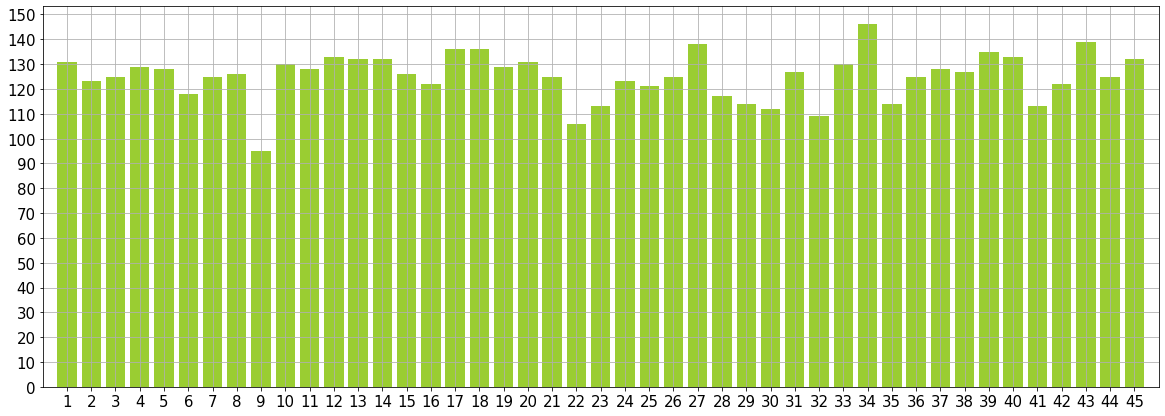

In [150]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams["font.size"] = 15
plt.figure(figsize=(20,7))
x = [x for x in count.values()]
y = [y for y in count.keys()]
plt.grid(True)
plt.xticks(np.arange(1,46))
plt.yticks(np.arange(0,250,10))
plt.xlim(0,46)
plt.bar(y,x, color='yellowgreen')
plt.show()

### 가장 많이 당첨번호로 등장한 숫자 10개 확인하기

In [151]:
common_num_10 = count.most_common(10)

In [152]:
common_num_10

[(34, 146),
 (43, 139),
 (27, 138),
 (17, 136),
 (18, 136),
 (39, 135),
 (12, 133),
 (40, 133),
 (14, 132),
 (13, 132)]

### 가장 1등 당첨금 수령액이 높았던 날 Top 10
1등수령액 열을 기준으로 내림차순 정렬을 통해 얻은 결과 중 상위 10개의 데이터만 확인해보았다.

In [153]:
lotto_df.sort_values(by=['1등수령액'], axis=0, ascending=False).head(10)

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
18,2003-04-12,19,6,30,38,39,40,43,26,105957818000,0,1,40722959400
24,2003-05-24,25,2,4,21,26,43,44,16,120073768000,0,2,24227745300
19,2003-04-19,20,10,14,18,20,23,30,41,81056776000,0,1,19352212800
42,2003-09-27,43,6,31,35,38,39,44,1,74686296000,0,1,17749630800
14,2003-03-15,15,3,4,16,30,31,37,13,73264910000,0,1,17014245000
35,2003-08-09,36,1,10,23,26,28,40,31,66856686000,0,1,16014475800
61,2004-02-07,62,3,8,15,27,29,35,21,66740368000,0,1,15817286400
32,2003-07-19,33,4,7,32,33,40,41,9,67457252000,0,1,14903517600
81,2004-06-26,82,1,2,3,14,27,42,39,61302808000,0,1,14562494400
85,2004-07-24,86,2,12,37,39,41,45,33,59835968000,0,1,14252186400


초반에 당첨자가 적었던 2003년~2004년 사이에 당첨된 사람들이었고 가장많이 받은 사람이 400억, 10명 중 적게 받은 사람이 142억 인 것을 볼 수 있다.

### 가장 1등 당첨자가 많았던 날 Top 10
1등 당첨금 열을 기준으로 내림차순 정렬을 통해 얻은 결과 중 상위 10개의 데이터만 확인해보았다.

In [154]:
lotto_df.sort_values(by=['1등당첨인원'], axis=0, ascending=False).head(10)

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
545,2013-05-18,546,8,17,20,27,37,43,6,56713166000,12178198500,30,405939950
20,2003-04-26,21,6,12,17,18,31,32,21,84247142000,0,23,797475400
776,2017-10-21,777,6,12,17,21,34,37,18,75534360000,17502828756,21,833468036
756,2017-06-03,757,6,7,11,17,33,44,1,71053002000,15536637018,21,739839858
909,2020-05-09,910,1,11,17,27,35,39,31,86308857000,19767643875,21,941316375
744,2017-03-11,745,1,2,3,9,12,23,10,73575119000,14936459640,20,746822982
380,2010-03-20,381,1,5,10,12,16,20,11,47943113000,10749039900,19,565738895
875,2019-09-14,876,5,16,21,26,34,42,24,85088368000,20722499264,19,1090657856
873,2019-08-31,874,1,15,19,23,28,42,32,82990138000,20108230506,18,1117123917
843,2019-02-02,844,7,8,13,15,33,45,18,87805610000,20933343756,18,1162963542


### 특정 값과 일치하는 데이터 필터링하기
### 1. 전체 로또 당첨 정보

In [155]:
df.head(939)

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,2002-12-07,1,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,2002-12-14,2,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2002-12-21,3,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,2002-12-28,4,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,2003-01-04,5,16,24,29,40,41,42,3,6277102000,3041094900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,2020-10-31,935,4,10,20,32,38,44,18,93934898000,22243720512,13,1711055424
935,2020-11-07,936,7,11,13,17,18,29,43,92246146000,20888968506,14,1492069179
936,2020-11-14,937,2,10,13,22,29,40,26,93720454000,22642629009,11,2058420819
937,2020-11-21,938,4,8,10,16,31,36,9,93452425000,22494665630,10,2249466563


### 2. 지정 회차 로또 당첨 정보

In [156]:
# 회차 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_회차 = df['회차'] == 100

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
회차 = df[is_회차]

# 결과를 출력합니다.
회차

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
99,2004-10-30,100,1,7,11,23,37,42,6,56561977000,0,4,3315315525


### 3. 최근 n회 로또 당첨 정보

In [157]:
# 회차 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_회차 = df['회차'] >= 900

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
회차 = df[is_회차]

# 결과를 출력합니다.
회차

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
899,2020-02-29,900,7,13,16,18,35,38,14,83639372000,20099108250,6,3349851375
900,2020-03-07,901,5,18,20,23,30,34,21,84783962000,20411772003,9,2267974667
901,2020-03-14,902,7,19,23,24,36,39,30,87501981000,21051127877,13,1619317529
902,2020-03-21,903,2,15,16,21,22,28,45,88625160000,21899568756,13,1684582212
903,2020-03-28,904,2,6,8,26,43,45,11,88938220000,21744622504,8,2718077813
904,2020-04-04,905,3,4,16,27,38,40,20,90357634000,21125037752,7,3017862536
905,2020-04-11,906,2,5,14,28,31,32,20,90948274000,22253465250,9,2472607250
906,2020-04-18,907,21,27,29,38,40,44,37,89331282000,22155413252,7,3165059036
907,2020-04-25,908,3,16,21,22,23,44,30,89923601000,22678849128,8,2834856141
908,2020-05-02,909,7,24,29,30,34,35,33,89543261000,22231691625,11,2021062875


### 4. 특정 회차 이전 n회 로또 당첨 정보

In [158]:
# 회차 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_회차 = df['회차'] <400

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
회차 = df[is_회차]

# 결과를 출력합니다.
회차

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,2002-12-07,1,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,2002-12-14,2,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2002-12-21,3,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,2002-12-28,4,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,2003-01-04,5,16,24,29,40,41,42,3,6277102000,3041094900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2010-06-26,395,11,15,20,26,31,35,7,46192580000,10742445000,7,1534635000
395,2010-07-03,396,18,20,31,34,40,45,30,45463736000,10593244800,2,5296622400
396,2010-07-10,397,12,13,17,22,25,33,8,45890007000,10498559100,3,3499519700
397,2010-07-17,398,10,15,20,23,42,44,7,45427304000,10722502200,4,2680625550


### 5. 특정 회차 이후 n회 로또 당첨 정보

In [159]:
# 회차 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_회차 = df['회차'] > 500

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
회차 = df[is_회차]

# 결과를 출력합니다.
회차

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
500,2012-07-07,501,1,4,10,17,31,42,2,52717711000,12100800375,4,3025200094
501,2012-07-14,502,6,22,28,32,34,40,26,54000640000,13208748750,6,2201458125
502,2012-07-21,503,1,5,27,30,34,36,40,53572205000,12975444375,7,1853634911
503,2012-07-28,504,6,14,22,26,43,44,31,51787037000,12989132625,9,1443236959
504,2012-08-04,505,7,20,22,25,38,40,44,49103223000,11507731125,6,1917955188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,2020-10-31,935,4,10,20,32,38,44,18,93934898000,22243720512,13,1711055424
935,2020-11-07,936,7,11,13,17,18,29,43,92246146000,20888968506,14,1492069179
936,2020-11-14,937,2,10,13,22,29,40,26,93720454000,22642629009,11,2058420819
937,2020-11-21,938,4,8,10,16,31,36,9,93452425000,22494665630,10,2249466563


### 6. 특정 회차 사이의 로또 당첨 정보

In [160]:
# 회차 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
#is_회차 = (900 <= df['회차'] <= 939)
is_회차 = (df['회차'] >= 900) & (df['회차'] <= 939)

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
회차 = df[is_회차]

# 결과를 출력합니다.
회차

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
899,2020-02-29,900,7,13,16,18,35,38,14,83639372000,20099108250,6,3349851375
900,2020-03-07,901,5,18,20,23,30,34,21,84783962000,20411772003,9,2267974667
901,2020-03-14,902,7,19,23,24,36,39,30,87501981000,21051127877,13,1619317529
902,2020-03-21,903,2,15,16,21,22,28,45,88625160000,21899568756,13,1684582212
903,2020-03-28,904,2,6,8,26,43,45,11,88938220000,21744622504,8,2718077813
904,2020-04-04,905,3,4,16,27,38,40,20,90357634000,21125037752,7,3017862536
905,2020-04-11,906,2,5,14,28,31,32,20,90948274000,22253465250,9,2472607250
906,2020-04-18,907,21,27,29,38,40,44,37,89331282000,22155413252,7,3165059036
907,2020-04-25,908,3,16,21,22,23,44,30,89923601000,22678849128,8,2834856141
908,2020-05-02,909,7,24,29,30,34,35,33,89543261000,22231691625,11,2021062875


### Discussion
로또 당첨 빅데이터를 통계적으로 분석했다. 로또는 매번 랜덤이다. 그러므로 지금까지 분석한 과거의 데이터로 미래를 예측할 수 없다. 종속이 아니라 완전 독립이므로 데이터 분서을 통해 이번 주 로또를 정확하게 알 수 있는 건 불가능하다.